<table align="center">
   <td align="center"><a target="_blank" href="https://colab.research.google.com/github/umbcdata602/spring2021/blob/master/curse_of_dimensionality.ipynb">
<img src="http://introtodeeplearning.com/images/colab/colab.png?v2.0"  style="padding-bottom:5px;" />Run in Google Colab</a></td>
</table>


# Curse of dimensionality

Reference: [Elements of Statistical Learning](https://web.stanford.edu/~hastie/ElemStatLearn/) (12th printing, 2017) by Hastie, Tibshirani and Friedman

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)

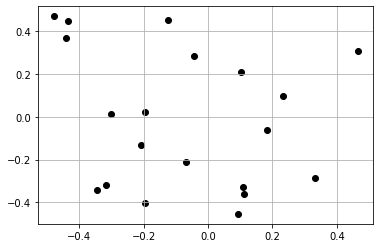

In [ ]:
samples = np.random.uniform(-.5,.5,(20, 2))

plt.scatter(samples[:,0], samples[:,1], c='black')
plt.grid();

Context

* $N$ = total number of samples (a constant).
* $p$ = number of features (each sample has $p$ features).
* Features are standardized on the unit cube in $p$ dimensions.
* Samples are uniformly distributed in all $p$ dimensions.

Problem

* You want to sample a fraction $r$ of the $N$ samples.
    * You must sample a fraction $r$ of the hypercube with volume $d^p$
    * $d$ is distance along the hypercube in one dimension
    * $d = r^{1/p}$

For example, if $r=0.1$ and $N=100$, then your sample size will be 10.

* If $p=1$, then $d=.1$ (1-D)
* If $p=2$, then $d=.32$ (2-D)
* If $p=3$, then $d=.46$
* If $p=10$, then $d=0.8$

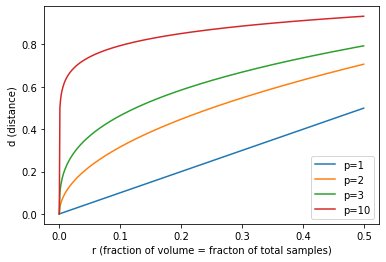

In [ ]:
n = 1000
r = np.arange(n*.5)/n

d_1 = r
d_2 = r**(1/2.)
d_3 = r**(1/3.)
d_10 = r**(1/10.)

plt.plot(r, d_1, label="p=1")
plt.plot(r, d_2, label='p=2')
plt.plot(r, d_3, label='p=3')
plt.plot(r, d_10, label='p=10')
plt.legend()
plt.ylabel("d (distance)")
plt.xlabel("r (fraction of volume = fracton of total samples)");

In other words, sampling 10% of N in 1-D requires that you sample 10% of the feature space. In 3-D, you need to sample a hypercube that's extends 40% on a side. And in 10-D, you need to sample 80% on a side. 

Viewed another way, suppose you want to maintain a sampling resolution if 10% of the feature space, $d=0.1$. In 1-D, you would be sampling 10% of $N$. In 2-D, you would sample 1% ($d^2$). And in 3-D, you sample 0.1% ($d^3$). So if $N=1000$, then on average you'd have 100 samples in 1-D, but only 1 sample in a 3-D hypercube. 

Bottom line: adding dimensions leads to sparse sampling -- the curse of dimensionality. Sparse sampling causes all sorts of problems, such as overfitting and poor numerical performance.